# **Student Grade Predictor using Linear Regression**

This is a machine learning algorithm for predicting student performance using the Linear Regression technique. The goal of this program is to forecast the final grades of students based on their academic performance and other related factors.

## **Overview**

In this algorithm, we use the `student-mat.csv` dataset, which is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance). The dataset contains information about student performance in mathematics. The features include attributes such as first-period grade, second-period grade, weekly study time, school type, family size, parent's occupation, and more.

## **Steps Performed by the Code**

The Student Grade Predictor is a tool that uses a Linear Regression model to predict the final grade of a student based on their first-period grade (`G1`), second-period grade (`G2`), and weekly study time. The model is trained on a dataset containing student information, and the user can input values for `G1`, `G2`, and study time through the terminal to obtain the predicted final grade for a new student.

The predictor uses one-hot encoding for categorical variables and is trained on a dataset (assuming the dataset is in the same directory as the script) that is preprocessed to handle missing values or categorical variables.

1. **Data Loading:** The code reads the `student-mat.csv` file, which contains the student performance data, using the pandas library. The data is loaded into a DataFrame for further processing.

2. **Data Preprocessing:** The dataset may have missing values or categorical variables that need handling. The code preprocesses the data, converting categorical variables into numerical form using one-hot encoding. This transformation is necessary because most machine learning algorithms, including Linear Regression, require numerical inputs.

3. **Data Splitting:** The data is split into training and testing sets using the `train_test_split()` function from sklearn. This ensures that the model is trained on a subset of the data and evaluated on unseen data to assess its generalization performance.

4. **Model Training:** The Linear Regression model from sklearn is created and trained on the training data using the `fit()` method. The model aims to learn the relationships between the features and the target variable (final grade).

5. **Model Evaluation:** After training, the model's performance is evaluated using the test data. Two common evaluation metrics used are Mean Squared Error (MSE) and R-squared (R2). MSE measures the average squared difference between the predicted and actual grades, while R2 indicates how well the model explains the variance in the target variable.

---

## **Getting Started:**

**Install the required packages**

These packages are essential for different aspects of the project, from data handling and machine learning to creating an interactive GUI within the Jupyter notebook environment.

- **Pandas**  # Data manipulation and analysis
- **Numpy**   # Fundamental package for numerical computations
- **Scikit-learn**  # Machine learning library
- **IPywidgets**    # Interactive widgets for Jupyter notebooks
- **matplotlib**     # Used to create a display graphs

In [1]:
# Install the required packages
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np  

**Loading Student Math Performance Dataset**

This code reads a CSV file containing student performance data from a file named `"student-mat.csv"` located in the `"data"` directory. The data is then stored in a Pandas DataFrame called data, using semicolon as the separator. This allows for further exploration and analysis of the student performance dataset.

In [2]:
file_path = "data/student-mat.csv"
data = pd.read_csv(file_path, sep=';')

**One-Hot Encoding for Categorical Variables**

This code performs one-hot encoding on the categorical variables in the 'data' DataFrame. It converts categorical features such as school, sex, address, etc., into numerical representations to prepare the data for machine learning models. The `pd.get_dummies()` function is used for this purpose, and the `drop_first=True` parameter is set to prevent multicollinearity by dropping one dummy variable per feature.

In [4]:
data = pd.get_dummies(data, columns=['school', 'sex', 'address', 'famsize', 'Pstatus',
                                     'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                                     'famsup', 'paid', 'activities', 'nursery', 'higher',
                                     'internet', 'romantic'], drop_first=True)

**Selecting Features and Target Variable**

 In this code section, the `features` and `target` variables are created. The `features` variable contains all columns from the `data` DataFrame except for the `G3` column, which represents the final grade. The `target` variable is set to the `G3` column, as it will be used as the output or the target variable for the machine learning model.

In [5]:
features = data.drop(columns=['G3']) 
target = data['G3']

**Training a Linear Regression Model**

This code section splits the data into training and testing sets using the train_test_split function from `scikit-learn`. The `features` and `target` variables obtained previously are used here. The data is split into 80% training set and 20% testing set, and a random state of 42 is set for reproducibility.

A Linear Regression model is then created using `linear_model.LinearRegression()`, and it is trained on the training data using the fit method with `X_train` as the features and `y_train` as the target variable. The model is now ready to make predictions on new data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**Evaluating the Linear Regression Model**

This code section makes predictions on the test set using the trained Linear Regression model. The predicted values are stored in the `y_pred` variable.

The model's performance is evaluated using two metrics:
1. Mean Squared Error `(MSE)`: It measures the average squared difference between the actual and predicted values.
2. R-squared `(R2)` Score: It indicates the proportion of the variance in the target variable that is predictable from the features. The higher the `R2` score, the better the model fits the data.

The metrics `mse` and `r2` are calculated based on the `y_test` (actual target values) and `y_pred` (predicted target values) to assess how well the Linear Regression model performs on unseen data.

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
overall_accuracy = r2 + (1 / mse)

print('R-Squared (R\u00b2): {:.2f}%'.format(r2 * 100))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Overall Accuracy Score: {:.0f}%'.format(overall_accuracy * 100))

R-Squared (R²): 72.41%
Mean Squared Error (MSE): 5.66
Overall Accuracy Score: 90%


**Function for Predicting the Grade of a New Student**

This function `predict_grade` takes a dictionary (`new_student_data`) containing the first-period grade (`G1`), second-period grade (`G2`), and weekly study time (`hours`) for a new student as input.

The function creates a DataFrame from the input data and performs one-hot encoding on the categorical features using `pd.get_dummies()`. The encoded data is then aligned with the original `features` DataFrame to ensure consistent column order and fill any missing columns with zeros.

Finally, the function uses the trained Linear Regression model (`model`) to predict the final grade for the new student based on the provided features. The predicted grade is returned as the output.

In [58]:
def predict_grade(new_student_data):
    new_student_features = pd.DataFrame(new_student_data)
    new_student_features_encoded = pd.get_dummies(new_student_features, drop_first=True)
    new_student_features_encoded = new_student_features_encoded.align(features, join='right', axis=1, fill_value=0)[0]
    predicted_grade = model.predict(new_student_features_encoded)
    return predicted_grade[0]

**User Input for a New Student**

The user is prompted to enter the information for a new student. The program uses the `input()` function to receive the following three inputs:
1. `g1_input`: The first-period grade (`G1`) of the new student, entered as an integer.
2. `g2_input`: The second-period grade (`G2`) of the new student, entered as an integer.
3. `studytime_input`: The weekly study time (`hours`) of the new student, entered as an integer.

These inputs will be used to create a dictionary (`new_student_data`) containing the features required to predict the final grade of the new student using the previously defined `predict_grade()` function.

In [59]:
g1_input = int(input("Enter G1 (first-period grade): "))
g2_input = int(input("Enter G2 (second-period grade): "))
studytime_input = int(input("Enter weekly study time (hours): "))

**Creating New Student Data**

This code section creates a dictionary called `new_student_data` to store the features of a new student. It uses the user inputs obtained earlier (`g1_input`, `g2_input`, and `studytime_input`) to populate the dictionary.

The dictionary contains the following three keys:
1. `'G1'`: Represents the first-period grade of the new student, with the value provided by the user as a list `[g1_input]`.
2. `'G2'`: Represents the second-period grade of the new student, with the value provided by the user as a list `[g2_input]`.
3. `'studytime'`: Represents the weekly study time (hours) of the new student, with the value provided by the user as a list `[studytime_input]`.

This dictionary is then used as input to the `predict_grade()` function to predict the final grade of the new student using the trained Linear Regression model.

In [60]:
new_student_data = {
    'G1': [g1_input],
    'G2': [g2_input],
    'studytime': [studytime_input],
}

**Predicting the Final Grade of a New Student**

In this code section, the `predict_grade()` function is called with the `new_student_data` dictionary as input to predict the final grade of the new student.

The predicted final grade is stored in the variable `predicted_grade`. The code then prints the predicted final grade for the new student using the message: "Predicted Final Grade for the New Student:" followed by the calculated `predicted_grade`.

This completes the process of predicting the final grade for a new student based on the provided input.

In [61]:
predicted_grade = predict_grade(new_student_data)
print("Predicted Final Grade for the New Student:", predicted_grade)

Predicted Final Grade for the New Student: 3.772902464115729


**Visualizing Actual vs. Predicted Final Grades and Model Performance Metrics**

This code section enhances the scatter plot created earlier to visualize the actual vs. predicted final grades. It also includes the model performance metrics on the plot for better analysis.

The plot size is adjusted using `plt.figure(figsize=(8, 6))`, and transparency (`alpha`) is set to 0.6 for better visibility of data points.

A red dashed line is added to represent the 'Perfect Prediction Line,' indicating where the actual and predicted grades would be equal.

Model performance metrics (MSE and R2 score) and the number of test samples are displayed on the plot using `plt.text()`.

Axes labels, title, legend, grid, and tick settings are adjusted to improve readability and understanding of the plot.

The updated plot provides a clear visualization of the model's predictions and its performance on the test set.

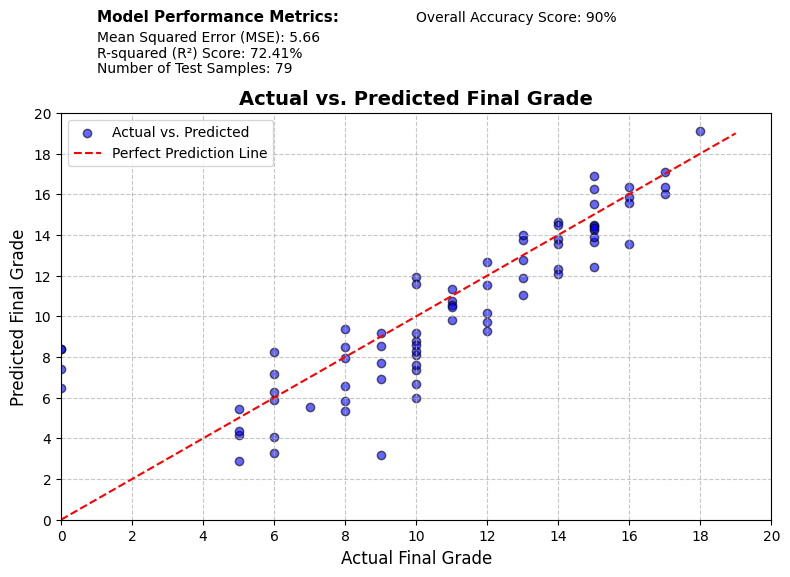

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Final Grade', fontsize=12)
plt.ylabel('Predicted Final Grade', fontsize=12)
plt.title('Actual vs. Predicted Final Grade', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 21, 2))
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.text(1, 24.5, 'Model Performance Metrics:', fontsize=11, fontweight='bold')
plt.text(1, 23.5, f'Mean Squared Error (MSE): {mse:.2f}', fontsize=10)
plt.text(1, 22.75, f'R-squared (R\u00b2) Score: {(r2 * 100):.2f}%', fontsize=10)
plt.text(1, 22, f'Number of Test Samples: {len(y_test)}', fontsize=10) 
plt.text(10, 24.5, f'Overall Accuracy Score: {(overall_accuracy * 100):.0f}%', fontsize=10)
plt.tight_layout()
plt.show()